In [366]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


In [367]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [370]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("car-mpg.csv")  

In [371]:
# Check top few records to get a feel of the data structure
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [372]:
mpg_df.describe().transpose()     # horsepower is missing

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [373]:
temp = pd.DataFrame(mpg_df.hp.str.isdigit()) 
temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [374]:
mpg_df = mpg_df.replace('?', np.nan)

In [375]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [376]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [377]:
numeric_cols = mpg_df.drop('car_name', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
car_names = pd.DataFrame(mpg_df[['car_name']])


numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
mpg_df = numeric_cols.join(car_names)

mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


##  Let us do a pair plot analysis to visually check number of likely clusters

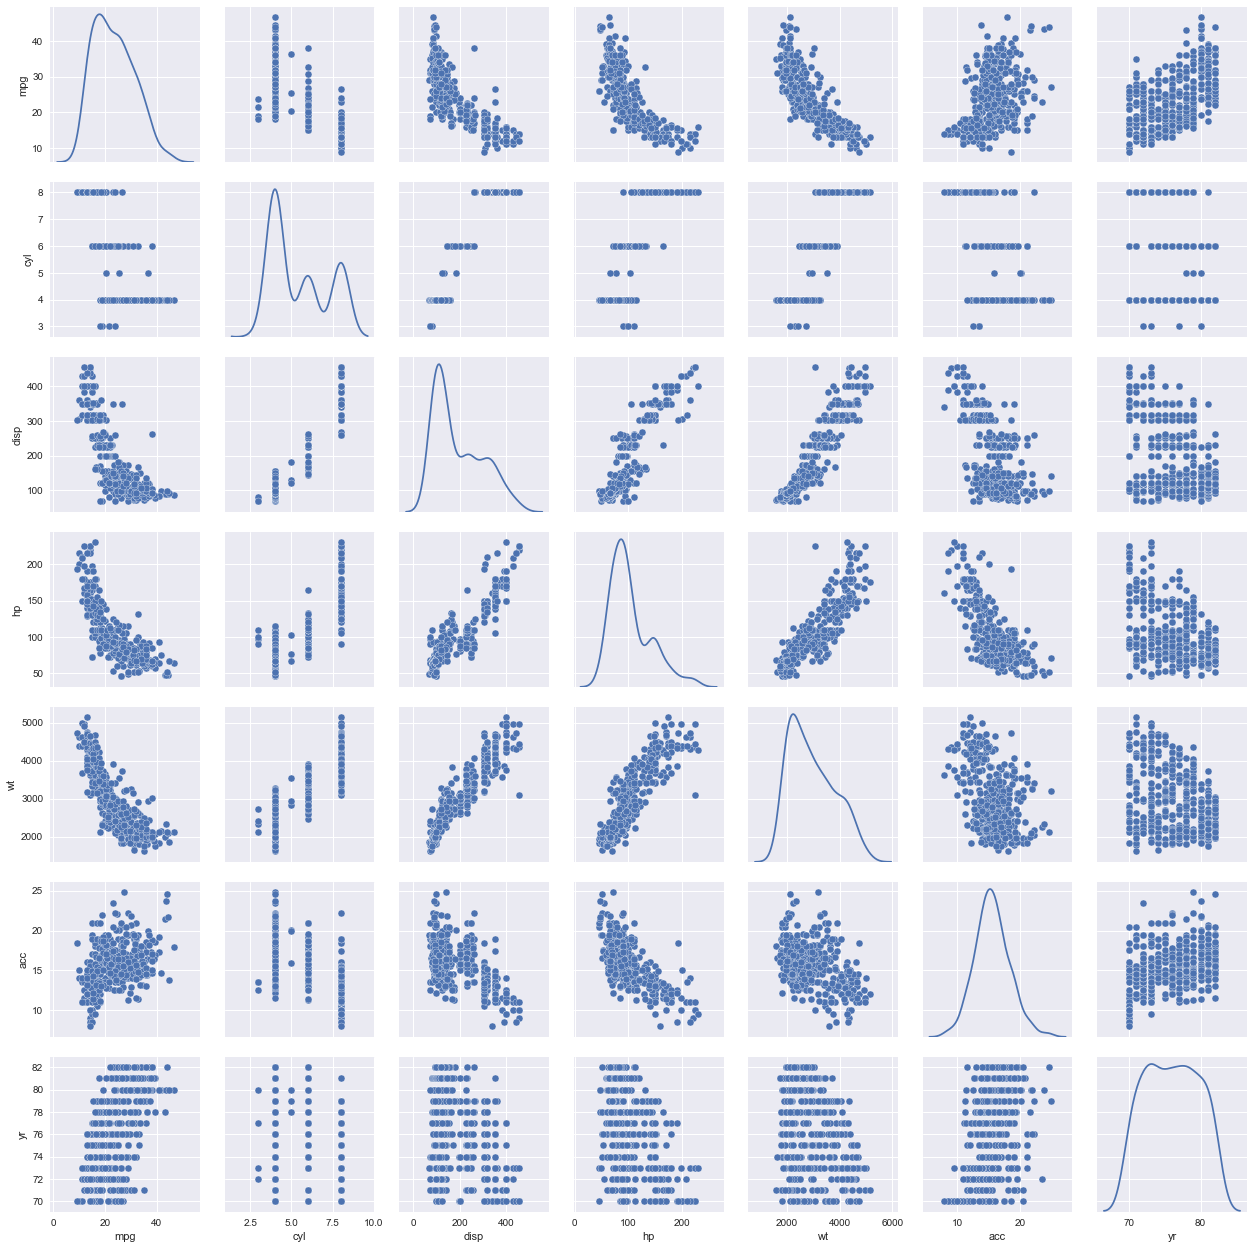

In [378]:
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

mpg_df_attr = mpg_df.iloc[:, 0:7]

sns.pairplot(mpg_df_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

In [379]:
cluster_range = range( 2, 6 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(mpg_df_attr)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,cluster_errors,num_clusters
0,7.428941e+07,2
1,3.420799e+07,3
2,1.905671e+07,4
3,1.375957e+07,5


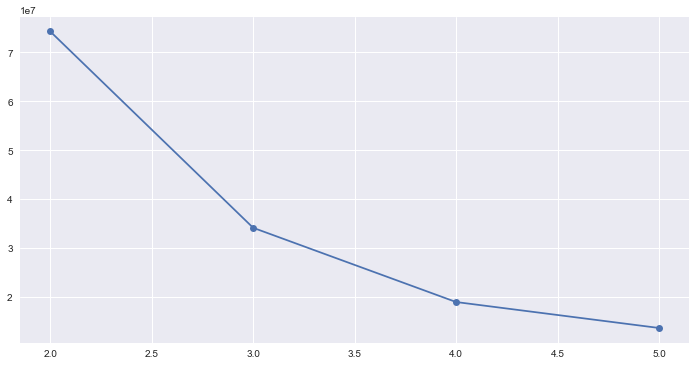

In [380]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### Looks like there are 4 or 3 good clusters

In [381]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

mpg_df_attr = mpg_df.loc[:, 'mpg':'origin']
mpg_df_attr_z = mpg_df_attr.apply(zscore)

cluster = KMeans( n_clusters = 4 , random_state = 2354 )
cluster.fit(mpg_df_attr_z)

prediction=cluster.predict(mpg_df_attr_z)
mpg_df_attr_z["GROUP"] = prediction

mpg_df_attr_z.head()
mpg_df_attr_z_copy = mpg_df_attr_z.copy(deep = True)

In [382]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.19662962, -0.83253762, -0.82055067, -0.54470596, -0.76233792,
         0.30865024, -0.64549188,  0.65931964],
       [-1.15871315,  1.49819126,  1.50068407,  1.51412926,  1.40001604,
        -1.07612225, -0.6725559 , -0.71514478],
       [-0.45827132,  0.30214934,  0.26682559, -0.09477119,  0.30537297,
         0.36925702,  0.04913083, -0.66202279],
       [ 1.21535383, -0.80280894, -0.78556433, -0.73643544, -0.78395572,
         0.33604619,  1.1198019 ,  0.58996593]])

In [383]:
centroid_df = pd.DataFrame(centroids, columns = list(mpg_df_attr) )
centroid_df

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,0.196630,-0.832538,-0.820551,-0.544706,-0.762338,0.308650,-0.645492,0.659320
1,-1.158713,1.498191,1.500684,1.514129,1.400016,-1.076122,-0.672556,-0.715145
2,-0.458271,0.302149,0.266826,-0.094771,0.305373,0.369257,0.049131,-0.662023
3,1.215354,-0.802809,-0.785564,-0.736435,-0.783956,0.336046,1.119802,0.589966


## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A902523F28>,
      dtype=object)

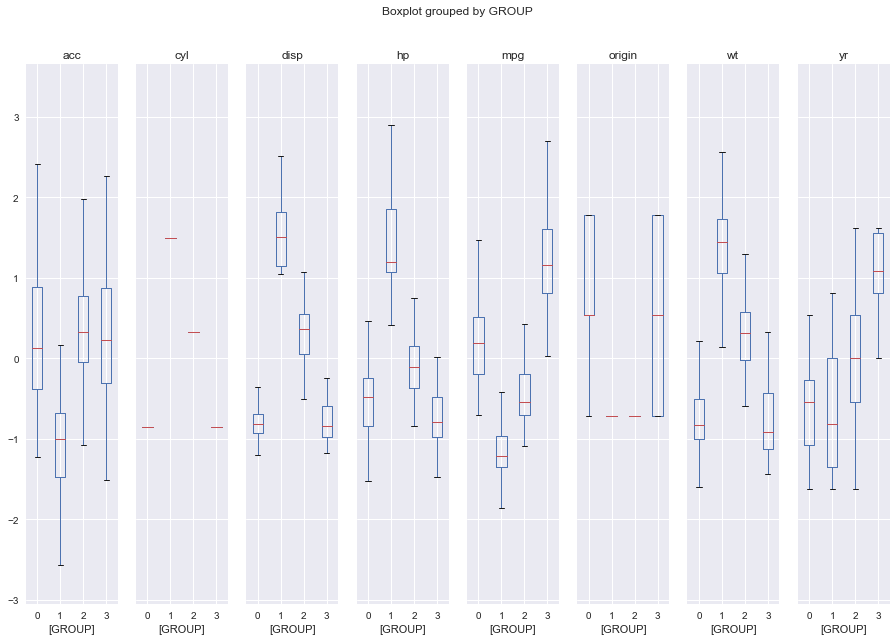

In [384]:
import matplotlib.pylab as plt

mpg_df_attr_z.boxplot(by = 'GROUP', layout=(1,8), figsize=(15, 10))

In [385]:
# There are many outliers on each dimension  (indicated by the black circles)
# Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
# If the outliers are addressed, the clusters will overlap much less than right now (except in year dimension which has no outlier)


## Identifying and handling outliers



In [386]:
mpg_df_attr_z.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,1
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,1
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,1
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,1
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145,1


In [387]:
# Addressing outliers at group level

data = mpg_df_attr_z   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    mean, std = group.median(), group.std()
    outliers = (group - mean).abs() > 2*std
    group[outliers] = mean       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(mpg_df_attr_z['GROUP']))


C:\Users\Mukesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A902930B38>,
      dtype=object)

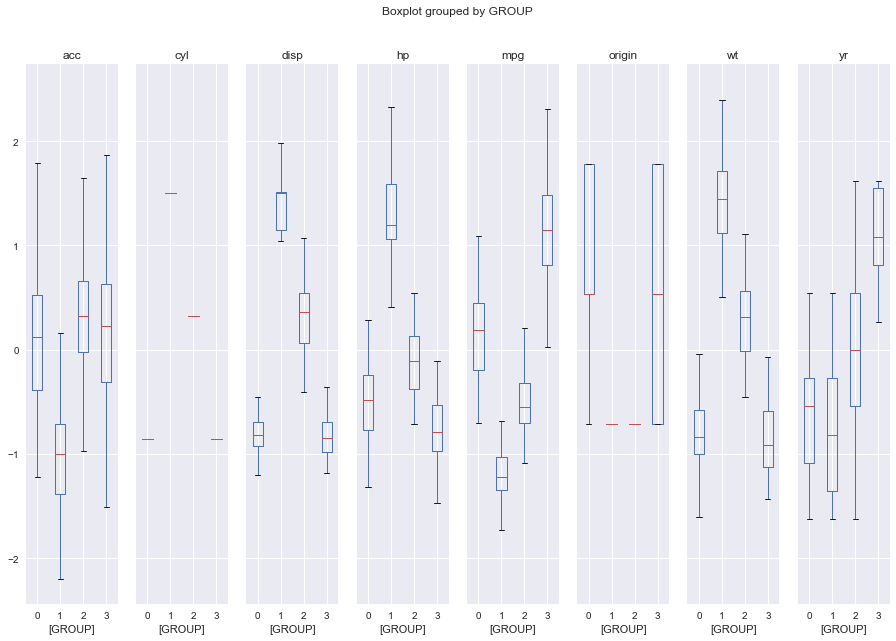

In [388]:
concat_data.boxplot(by = 'GROUP', layout=(1,8), figsize=(15, 10))

### Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them


# Let us analyze the mpg column vs other columns group wise. 

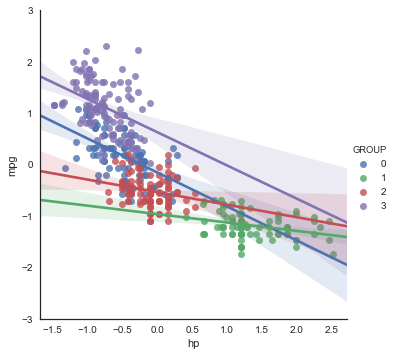

In [389]:
# mpg Vs hp

var = 'hp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

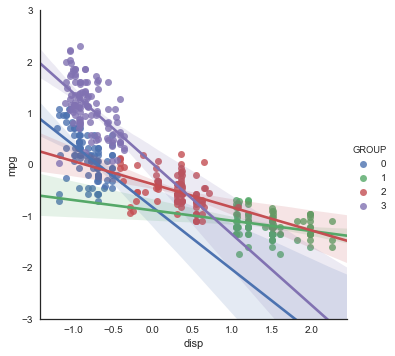

In [390]:
var = 'disp'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

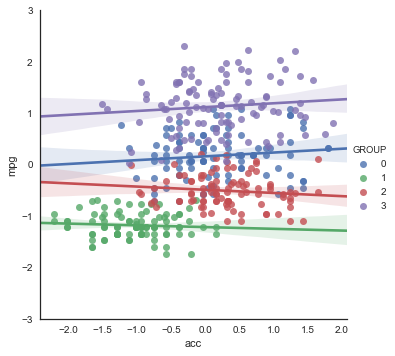

In [391]:
var = 'acc'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

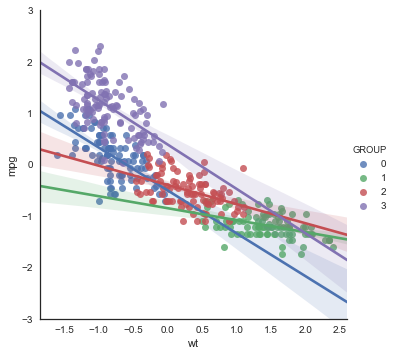

In [392]:
var = 'wt'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

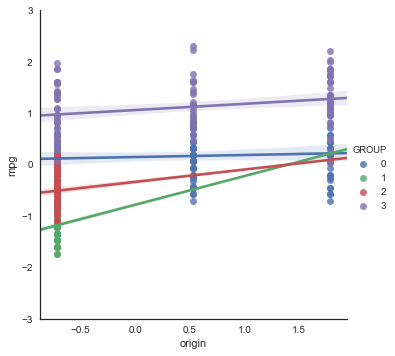

In [393]:
var = 'origin'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

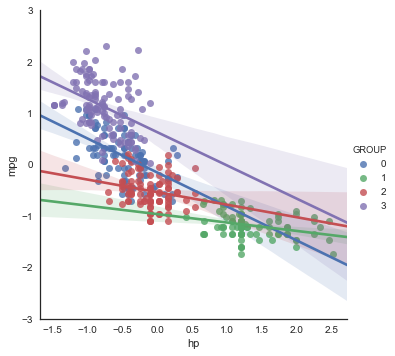

In [394]:
var = 'hp'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

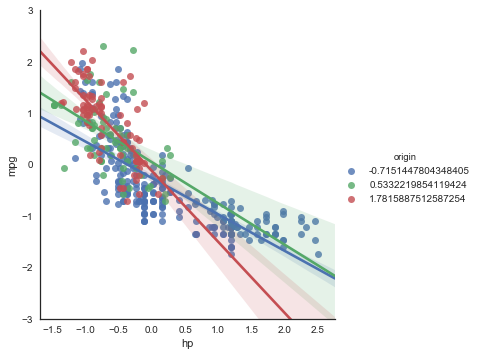

In [395]:
var = 'hp'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='origin')
plot.set(ylim = (-3,3))

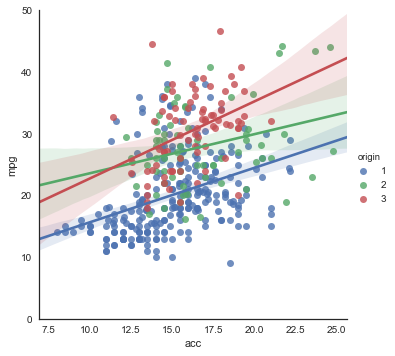

In [396]:
# Let us analyze origin wise. Do the origins form natural groups

# Looking at the countrywise spread, maybe subclusters i.e. within origin cluster sub clusters will give better results

var = 'acc'


with sns.axes_style("white"):
    plot = sns.lmplot( var,'mpg',data=mpg_df_attr,hue='origin')
plot.set(ylim = (0,50))

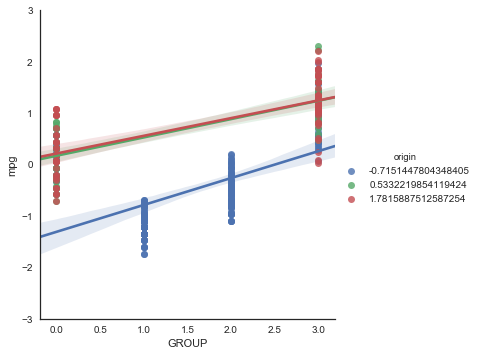

In [397]:
# Let us analyze origin wise. Do the origins form natural groups

# Looking at the countrywise spread, maybe subclusters i.e. within origin cluster sub clusters will give better results

var = 'GROUP'



with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='origin')
plot.set(ylim = (-3, 3))

In [398]:
from sklearn.model_selection import train_test_split

mpg_df_attr_z.pop('origin')
mpg_df_attr_z.pop('GROUP')
mpg_df_attr_z.pop('yr')
array = mpg_df_attr_z.values
X = array[:,1:5] # select all rows and first 7 columns which are the attributes
y = array[:,0]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [399]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(X_train , y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [400]:
y_pred = clr.predict(X_test)

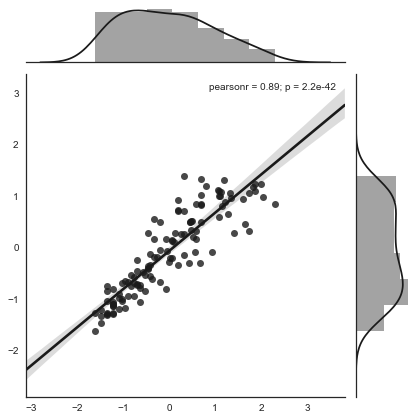

In [401]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");


##  ITERATION 2 





In [402]:
# 1. Drop acc column based on the above visual analysis

mpg_df_attr_z.pop('acc')

array = mpg_df_attr_z.values
X = array[:,1:5] # select all rows and first 7 columns which are the attributes
y = array[:,0]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
clr.fit(X_train , y_train)
y_pred = clr.predict(X_test)

            
          


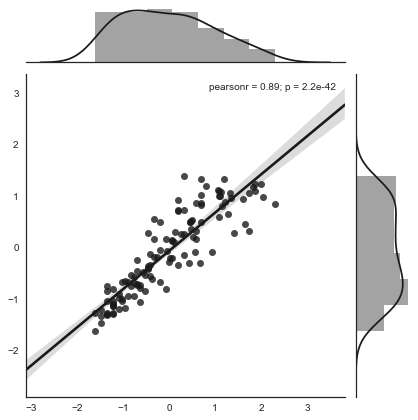

In [403]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

## Iteration 3

In [426]:
# Let us segregate the data group wise and build individual models

mpg_df_attr_z = mpg_df_attr_z_copy.copy()
mpg_df_group1 = mpg_df_attr_z[mpg_df_attr_z['GROUP']==0]
mpg_df_group1.head()


,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
14,0.062185,-0.856321,-0.772295,-0.243723,-0.707544,-0.206262,-1.627426,1.781589,0
18,0.446497,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,-1.627426,1.781589,0
19,0.318393,-0.856321,-0.925936,-1.527300,-1.342463,1.790672,-1.627426,0.533222,0
20,0.190289,-0.856321,-0.801103,-0.453287,-0.352841,0.701436,-1.627426,0.533222,0
21,0.062185,-0.856321,-0.829911,-0.374700,-0.638968,-0.387801,-1.627426,0.533222,0


In [427]:
mpg_df_group1.pop('origin')
mpg_df_group1.pop('GROUP')
mpg_df_group1.pop('yr')
#mpg_df_attr_z.pop('acc')

array = mpg_df_group1.values
X = array[:,1:5] 
y = array[:,0]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [428]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(X_train , y_train)



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [429]:
y_pred = clr.predict(X_test)

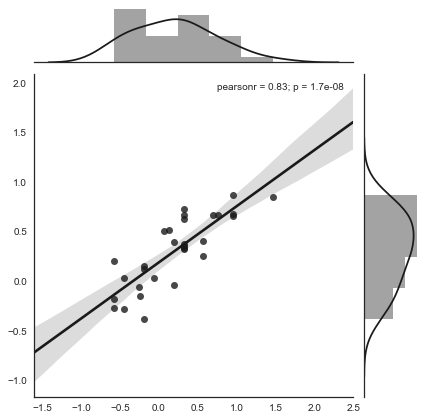

In [430]:
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

# Feature Engineering



In [431]:
# Mileage is Miles per liter.... Let us check if there is any strong relation between 
# mileage and kg / hp. We will create a new column kg/hp

mpg_df_attr_z['kg_per_hp'] = mpg_df_attr_z['hp'] / mpg_df_attr_z['wt']

In [432]:
mpg_df_attr_z.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP,kg_per_hp
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,1,1.066967
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,1,1.861052
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,1,2.174552
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,1,2.188655
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145,1,1.652535


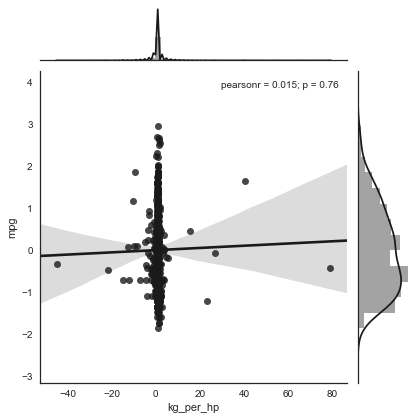

In [433]:
with sns.axes_style("white"):
    sns.jointplot(x=mpg_df_attr_z['kg_per_hp'], y=mpg_df_attr_z['mpg'], kind="reg", color="k");

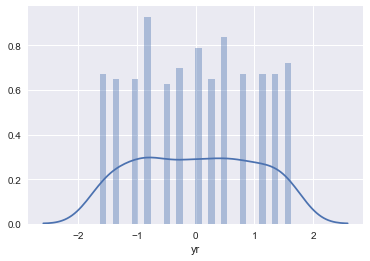

In [434]:
# Not helpful.
# Let us check the distribution of the cars by age of the car

sns.distplot( mpg_df_attr_z["yr"], bins=30)

## Modify the clustering strategy. 


In [ ]:
# Large cars (higher horsepower, higher displacement, higher wt) seem to have a better inverse relation with mileage than small 
# cars. Let us see if we can cluster on these dimensions

In [435]:
mpg_df_attr = mpg_df.loc[:, 'mpg':'origin']
mpg_df_attr_z = mpg_df_attr.apply(zscore)

cluster = KMeans( n_clusters = 2 , random_state = 2354 )
cluster.fit(mpg_df_attr_z)

prediction=cluster.predict(mpg_df_attr_z)
mpg_df_attr_z["GROUP"] = prediction

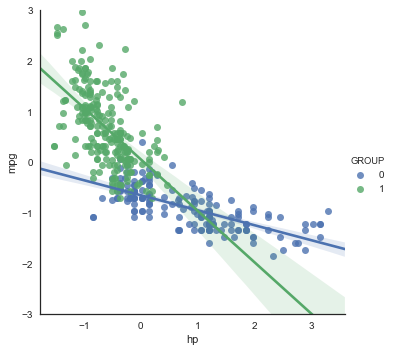

In [436]:
# mpg Vs hp

var = 'hp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=mpg_df_attr_z,hue='GROUP')
plot.set(ylim = (-3,3))

In [437]:
# In the graph above, higher mpg, lower hp cars are likely small and medium size 
# The higher horse power and lower mpg ones are likely be large cars 
# There is an overlap indicating lower Hp ars with lower mpg which could be very old small cars
# The pair plot also shows that small cars come into the second hand car market much younger than large cars. Hence
# their mileage is high (resell before too old)

# Let us check the model on these clusters (large and small cars)

In [443]:
mpg_df_group1 = mpg_df_attr_z[mpg_df_attr_z['GROUP']==1]   # Separating out large cars
mpg_df_group1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
14,0.062185,-0.856321,-0.772295,-0.243723,-0.707544,-0.206262,-1.627426,1.781589,1
18,0.446497,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,-1.627426,1.781589,1
19,0.318393,-0.856321,-0.925936,-1.527300,-1.342463,1.790672,-1.627426,0.533222,1
20,0.190289,-0.856321,-0.801103,-0.453287,-0.352841,0.701436,-1.627426,0.533222,1
21,0.062185,-0.856321,-0.829911,-0.374700,-0.638968,-0.387801,-1.627426,0.533222,1


In [444]:
mpg_df_group1.pop('origin')
mpg_df_group1.pop('GROUP')
mpg_df_group1.pop('yr')
#mpg_df_attr_z.pop('acc')

array = mpg_df_group1.values
X = array[:,1:5] # select all rows and first 7 columns which are the attributes
y = array[:,0]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [445]:
from sklearn import svm
clr = svm.SVR()  
clr.fit(X_train , y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [446]:
y_pred = clr.predict(X_test)

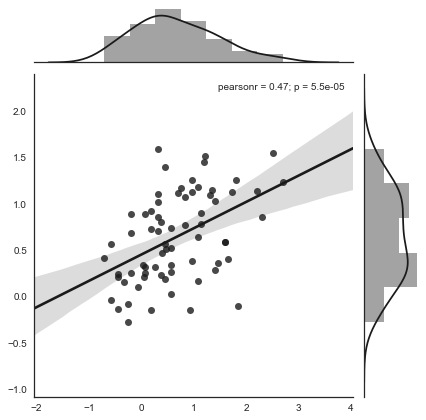

In [447]:
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [ ]:
# Within clusters there is too much of noise on all dimensions
# Clusteres are overlapping on most dimensions
# Though we got the right number of clusters 3,4 , the noise within the cluster and overlap on attributes is 
# making it difficult to cross 95% score on test data


# Model accuracy prediction in production environment



In [516]:
# KFold Cross Validation


# Evaluate using Cross Validation
from sklearn import model_selection
from sklearn import svm

model = svm.SVR()  

#mpg_df_attr_z_copy = mpg_df_attr_z.copy(deep = True)

array = mpg_df_attr_z.values
X = array[:,1:7] 
y = array[:,0]    

seed = 10
kfold = model_selection.KFold(n_splits=10, random_state=seed)

results = model_selection.cross_val_score(model, X, y, cv=kfold)






print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))



print(results)

Accuracy: 74.118% (20.846%)
[0.78693948 0.89290856 0.80192489 0.88515565 0.76058676 0.93310654
 0.77553926 0.84610978 0.20315644 0.5264017 ]


In [473]:
# With the current data quality, the model is likely to give accuracy of 72% with stand dev in estimation of +/- 20.84!!!